# Кт №2 Кутуев Тимур, Э-1613

### Импорт библиотек

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
pd.set_option('display.max_colwidth', 1500)
from sympy import *
import seaborn as sns
%matplotlib inline

### Чтение данных

In [287]:
data = pd.read_fwf('clustfeb.dat', index_col='YEAR')
data

,1,2,3,4,5,6,7
YEAR,,,,,,,
1982,4.2,13.3,-5.3,4.0,23.0,6.0,0.0
1983,1.0,7.8,-5.3,3.0,34.0,11.0,8.0
1984,2.9,11.4,-5.1,3.2,65.0,17.0,0.0
1985,1.6,10.2,-6.0,2.9,7.0,2.0,5.0
1986,-1.1,2.7,-9.0,1.5,22.0,5.0,24.0
1987,3.3,13.4,-7.3,2.7,46.0,15.0,2.0
1988,4.5,13.0,-2.9,3.7,89.0,22.0,4.0
1989,5.7,13.5,-2.7,5.2,92.0,16.0,0.0
1990,6.6,14.9,-0.6,5.5,131.0,29.0,0.0


In [288]:
# Сменим названия наших колонок с цифр на что-то более значимое
data = data.rename(columns={'1':"Mean_t", "2":"Max_t", "3":"Min_t", "4":"Soil_t", "5":"Month_rainfall", "6":"Max_rain_per_day", "7":"Days_with_snow"})
data

,Mean_t,Max_t,Min_t,Soil_t,Month_rainfall,Max_rain_per_day,Days_with_snow
YEAR,,,,,,,
1982,4.2,13.3,-5.3,4.0,23.0,6.0,0.0
1983,1.0,7.8,-5.3,3.0,34.0,11.0,8.0
1984,2.9,11.4,-5.1,3.2,65.0,17.0,0.0
1985,1.6,10.2,-6.0,2.9,7.0,2.0,5.0
1986,-1.1,2.7,-9.0,1.5,22.0,5.0,24.0
1987,3.3,13.4,-7.3,2.7,46.0,15.0,2.0
1988,4.5,13.0,-2.9,3.7,89.0,22.0,4.0
1989,5.7,13.5,-2.7,5.2,92.0,16.0,0.0
1990,6.6,14.9,-0.6,5.5,131.0,29.0,0.0


Год  - YEAR

Средняя температура - Mean_t

Максимальная температура - Max_t

Минимальная температура - Min_t

Средняя температура почвы (на глубине 10 см) - Soil_t

Месячные осадки (мм) - Month_rainfall

Максимальные осадки в день - Max_rain_per_day

Количество снежных дней - Days_with_snow

Можно посмотреть на корреляцию признаков. 
Для большей наглядности давайте взгянем на следующий график.

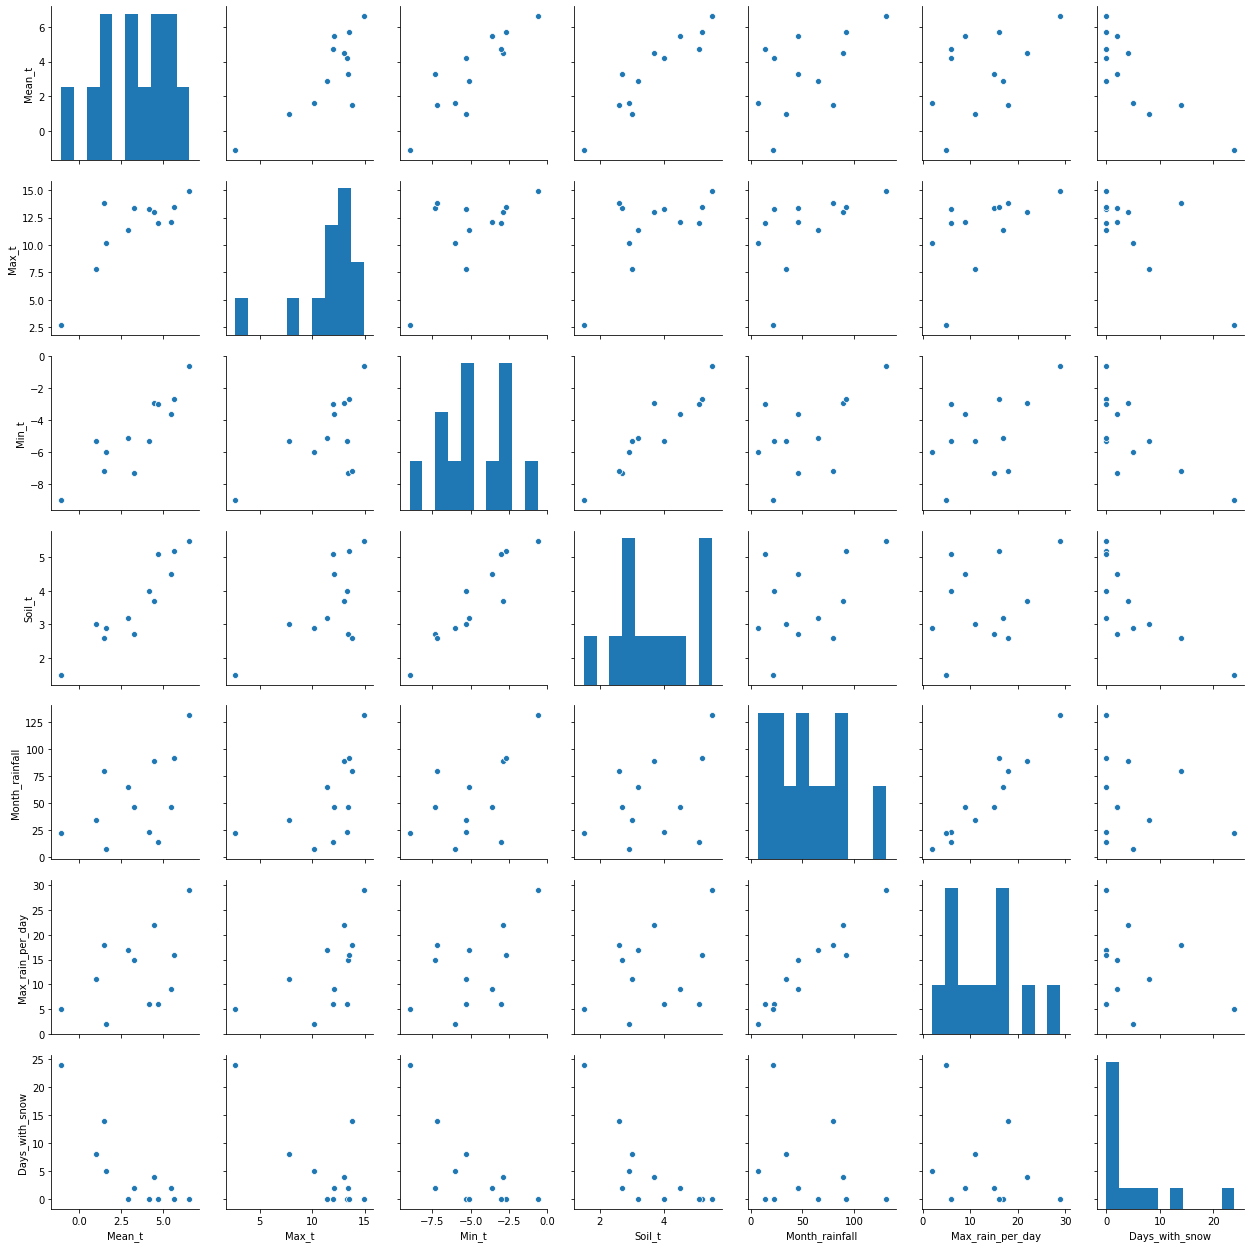

In [289]:
sns.pairplot(data) 

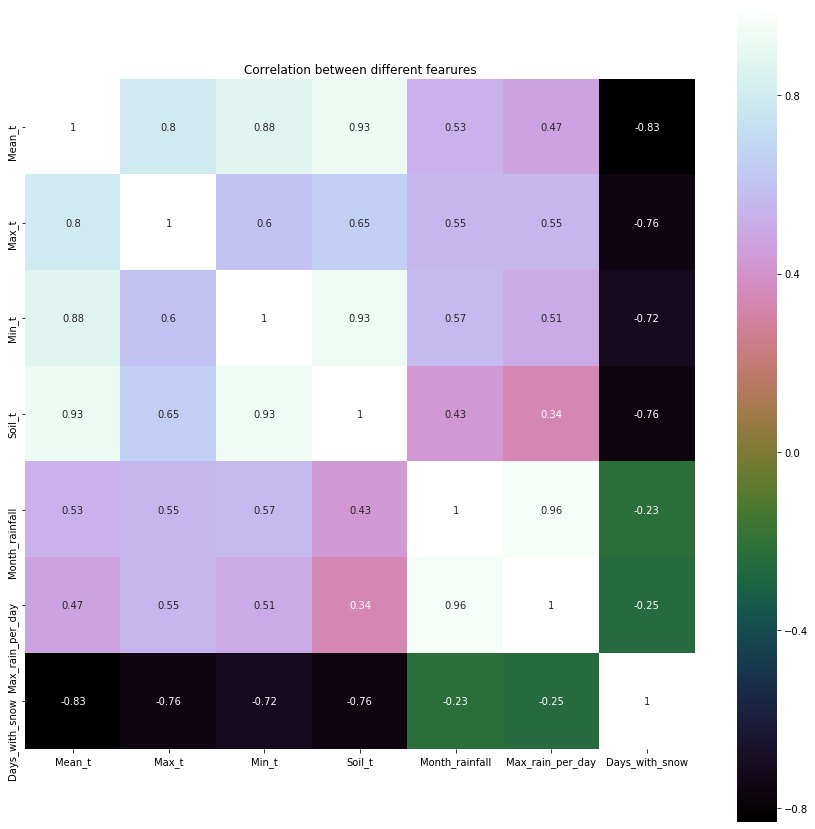

In [290]:
correlation = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
plt.show()

Как мы видим на графике выше, наши признаки достаточно сильно коррелируют между собой. 
Самая большая корреляция (0,96) между Max_rain_per_day и Mounth_rainfall(Максимальное кол-во осадков в день и месячные осадки) и это достаточно логично. 
Средняя температура сильно коррелирует (0,93) со средней температурой почвы на глубине 10см, что тоже достаточно логично и реально. 
Есть так же сильная коррелияция  (0,93) между минимальной температурой и средней температурой почвы. В принципе, это логично, при повышении температуры, почва дольше прогревается чем воздух и может соответствовать минимальной температуре.

### Стандартизуем данные

In [334]:
value_for_stand = data.values # Матрица значений
standart_data = StandardScaler().fit_transform(value_for_stand) # Стандартизация
standart_data

array([[ 0.38375347,  0.55873943, -0.20529492,  0.29059019, -0.85888404,
        -0.92046849, -0.69828598, -0.42008403],
       [-1.08985987, -1.15646068, -0.20529492, -0.55991768, -0.5549358 ,
        -0.262991  ,  0.43790816, -0.42008403],
       [-0.21490195, -0.03378424, -0.11731139, -0.38981611,  0.3016456 ,
         0.525982  , -0.69828598, -0.42008403],
       [-0.81355737, -0.40800972, -0.51323731, -0.64496847, -1.30099057,
        -1.44645049,  0.01183536, -0.42008403],
       [-2.05691863, -2.74691897, -1.83299039, -1.83567949, -0.8865157 ,
        -1.05196399,  2.71029642,  2.94058818],
       [-0.03070028,  0.58992489, -1.08513031, -0.81507004, -0.2233559 ,
         0.262991  , -0.41423744, -0.42008403],
       [ 0.52190473,  0.46518306,  0.85050754,  0.03543783,  0.9648054 ,
         1.18345949, -0.13018891, -0.42008403],
       [ 1.07450973,  0.62111034,  0.93849108,  1.31119964,  1.04770037,
         0.3944865 , -0.69828598, -0.42008403],
       [ 1.48896348,  1.05770674

### Кластерный анализ №1

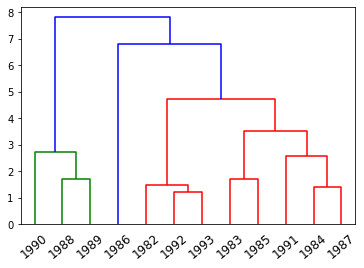

In [292]:
link = linkage(standart_data, 'ward', 'euclidean')
dn = dendrogram(link, labels = data.index.tolist(), leaf_rotation=40.)

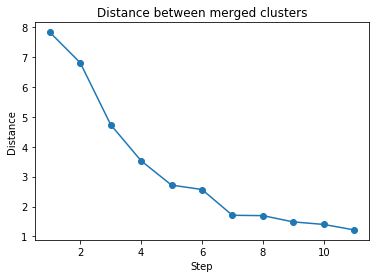

In [293]:
# Каменистая осыпь
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance');

In [294]:
data['cluster'] = fcluster(link, 3, criterion='maxclust')
data.groupby('cluster').mean()

,Mean_t,Max_t,Min_t,Soil_t,Month_rainfall,Max_rain_per_day,Days_with_snow
cluster,,,,,,,
1,5.6000,13.80,-2.066667,4.8,104.000,22.333333,1.333333
2,3.0875,11.75,-5.350000,3.5,39.375,10.500000,3.875000
3,-1.1000,2.70,-9.000000,1.5,22.000,5.000000,24.000000


In [295]:
data.groupby('cluster').std()

,Mean_t,Max_t,Min_t,Soil_t,Month_rainfall,Max_rain_per_day,Days_with_snow
cluster,,,,,,,
1,1.053565,0.984886,1.274101,0.964365,23.430749,6.506407,2.309401
2,1.640068,1.987101,1.525966,0.922729,25.025344,5.781745,4.969550
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
data.groupby('cluster').size()

cluster
1    3
2    8
3    1
dtype: int64

Проведя кластерный анализ методом Варда, и посмотрев на дендрограмму мы решили выделить 4 кластера. 

В первый кластер вошло 3 года: 1988, 1989, 1990. Эти 3 года характеризуются большим кол-вом осадков и дождливых дней. Так же, эти 3 года являются самыми теплыми по погоде в феврале. 

Во второй кластер вошло 8 наблюдений: 1982, 1983, 1984, 1985, 1987, 1991, 1993, 1993.
Эти наблюдения можно охарактеризовать как нормальные для февральской погоды. Были как и снежные, так и дождливые дни. 

В третий кластер попало одно наблюдение, 1986 год. В феврале данного года было большое кол-во снежных дней(24 из 28), соответсвенно в этом феврале средняя температура опустилась до -1.1 градуса и минимальная температура достигла -9 градусов.

### Кластерный анализ №2

Давайте проведем еще один кластерный анализ, но уже другим методом и посмотрим на его результаты

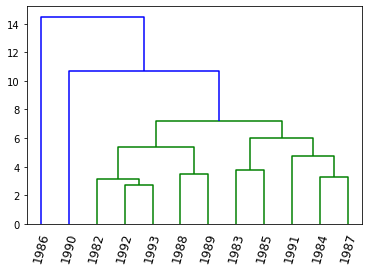

In [297]:
link = linkage(standart_data, 'average', 'cityblock')
dn = dendrogram(link, labels = data.index.tolist(), leaf_rotation=75.)

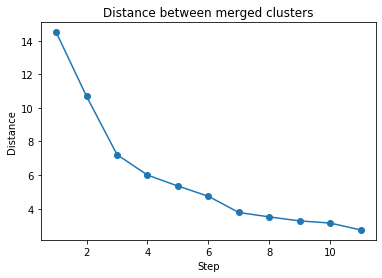

In [298]:
# Каменистая осыпь
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance');

In [299]:
data['cluster'] = fcluster(link, 4, criterion='maxclust')
data.groupby('cluster').mean()

,Mean_t,Max_t,Min_t,Soil_t,Month_rainfall,Max_rain_per_day,Days_with_snow
cluster,,,,,,,
1,4.92,12.78,-3.50,4.50,52.8,11.8,1.2
2,2.06,11.32,-6.18,2.88,46.4,12.6,5.8
3,6.60,14.90,-0.60,5.50,131.0,29.0,0.0
4,-1.10,2.70,-9.00,1.50,22.0,5.0,24.0


In [300]:
data.groupby('cluster').size()

cluster
1    5
2    5
3    1
4    1
dtype: int64

Итак, проведя анализ уже другим методом, мы получили другой результат. По-скольку метод Манхэттена "устойчив" к выбросам, он сразу выделил 2 года в отдельные кластеры. 

Как и в предыдущем анализе, мы получили кластер из 1986 года, аномального по кол-ву снежных дней и минимальной температуре.

Однако, в этом анализе мы видим еще один аномальный год. Февраль 1990 года. Февраль этого года хар-тся как "аномально" теплым (максимальная температура 14.9 градусов) и максимально дождливым. Как мы видим, месячные осадки в этом месяце составили 131мм. 

Два оставшихся кластера особых различий не имеют по каким-то показателям, и их можно объединить в один и охарактеризовать как стандартные феврали. 

## Итоги №1 и №2 кластерного анализа

На мой взгляд, второй кластерный анализ вышел более успешным. В первом кластерном анализе не был обнаружен выброс в виде 1990 года с его аномальными показателями, в связи с чем был неверно охарактеризован первый кластер. 

# Метод главных компонент

In [337]:
data = pd.read_fwf('clustfeb.dat', index_col='YEAR')
data = data.rename(columns={'1':"Mean_t", "2":"Max_t", "3":"Min_t", "4":"Soil_t", "5":"Month_rainfall", "6":"Max_rain_per_day", "7":"Days_with_snow"})


scaler = StandardScaler().fit_transform(data.values)
pca = PCA(n_components=3 , svd_solver = 'full')

print('Матрица главных компонент','\n', pca.fit_transform(scaler),'\n') 
print('Вектор средних: ','\n' , pca.mean_,'\n')
print('Вектор(матрица) проекции: ', '\n' , pca.components_.T,'\n')
print('Доля информации (доля от общей дисперсии): ','\n' , 
      pca.explained_variance_ratio_,'\n')
print('Процент потерянной информации =', round(1-pca.explained_variance_ratio_.sum(),3)*100, "%",'\n')
print('Кол-во переменных =', pca.n_components_)

Матрица главных компонент 
 [[-0.11628387  1.48052047  0.63025196]
 [ 1.64740639 -0.0582451  -0.550653  ]
 [-0.19886476 -0.38773982  0.43494419]
 [ 1.84292451  1.2825505   0.28737153]
 [ 5.0468728  -0.96519478 -1.10114756]
 [ 0.40505426 -0.2018227   1.44087842]
 [-1.4866791  -1.05437672 -0.11849377]
 [-2.33495465  0.05735439 -0.41951686]
 [-4.03164008 -1.39168075 -0.69835769]
 [ 0.93657301 -1.83059981  0.91211553]
 [-0.93216137  1.04548968 -0.32100916]
 [-0.77824714  2.02374463 -0.49638359]] 

Вектор средних:  
 [ 5.55111512e-17 -3.35379872e-16 -1.11022302e-16 -2.59052039e-16
 -1.48029737e-16 -9.25185854e-18 -1.85037171e-17] 

Вектор(матрица) проекции:  
 [[-0.43358215  0.17792986 -0.03614136]
 [-0.38521125  0.01115914  0.68528832]
 [-0.41331509  0.10595966 -0.50313951]
 [-0.4056677   0.2693316  -0.37975261]
 [-0.3193745  -0.59349332 -0.0959939 ]
 [-0.30378111 -0.61697982  0.05972638]
 [ 0.36597833 -0.38929559 -0.34486264]] 

Доля информации (доля от общей дисперсии):  
 [0.69126778 0.

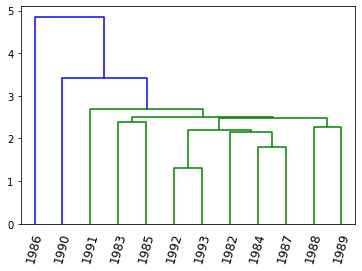

In [312]:
link = linkage(pca.fit_transform(scaler), 'single', 'cityblock')
dn = dendrogram(link, labels = data.index.tolist(), leaf_rotation=75.)

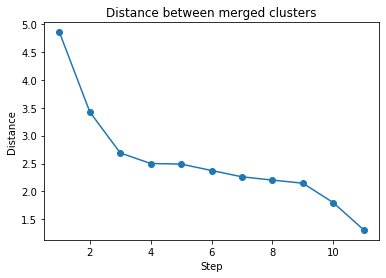

In [313]:
# Каменистая осыпь
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance');

In [329]:
data['cluster'] = fcluster(link, 3, criterion='maxclust')
data.groupby('cluster').mean()

,Mean_t,Max_t,Min_t,Soil_t,Month_rainfall,Max_rain_per_day,Days_with_snow
cluster,,,,,,,
1,3.49,12.05,-4.84,3.69,49.6,12.2,3.5
2,6.60,14.90,-0.60,5.50,131.0,29.0,0.0
3,-1.10,2.70,-9.00,1.50,22.0,5.0,24.0


In [330]:
data.groupby('cluster').size()

cluster
1    10
2     1
3     1
dtype: int64

Вообще, кластерный анализ можно проводить когда число наблюдений не менее чем в два раза больше числа переменных, поэтому тут проводить кластерный анализ не совсем уместно. 
Проведя кластерный анализ, мы выделили 3 главные компоненты, и доля потерянной информации составила всего 3.9% что очень хорошо для нас, мы почти не потеряли информации! 

Проведя кластерный анализ по факторному, была получена более точная картина(при выборе определнного метода). Мы сразу выделили 2 аномальных года, а остальные года отнесли к одному оббщему кластеру, который хар-тся стандартными характеристиками для февраля. 

### Чуть-чуть графиков

Давайте посмотрим на нормальность распределения наших переменных. 

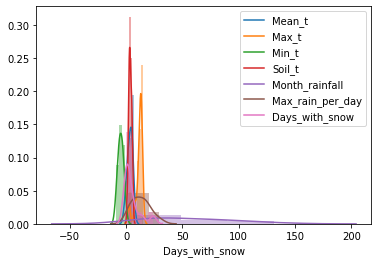

In [306]:
data = pd.read_fwf('clustfeb.dat', index_col='YEAR')
data = data.rename(columns={'1':"Mean_t", "2":"Max_t", "3":"Min_t", "4":"Soil_t", "5":"Month_rainfall", "6":"Max_rain_per_day", "7":"Days_with_snow"})

for column in data:
    sns.distplot(data[column] , kde_kws={ "label":column})

Выкинем переменную из-за которой наш график так сильно распозается и отразим ее отдельно.

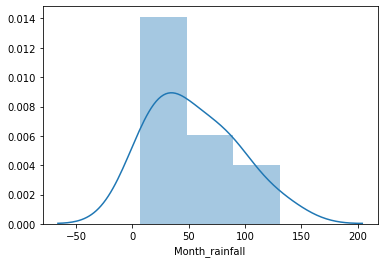

In [308]:
sns.distplot(data['Month_rainfall'])

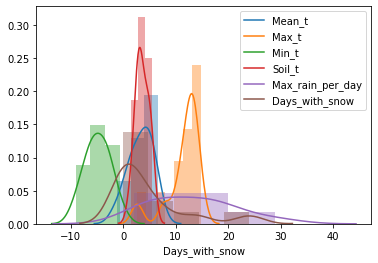

In [310]:
data_without_rainfall = data.drop(columns = 'Month_rainfall')
for column in data_without_rainfall:
    sns.distplot(data_without_rainfall[column] , kde_kws={ "label":column})

В целом, наши данные данные распределены нормально, так что анализ проведенный выше, можно считать состоявшимся

In [332]:
ex_2 = pd.DataFrame(pca.fit_transform(scaler), columns=['PC1', 'PC2', 'PC3'])
ex_2['Type'] = data.cluster.values
ex_2


,PC1,PC2,PC3,Type
0,-0.116284,1.480520,0.630252,1
1,1.647406,-0.058245,-0.550653,1
2,-0.198865,-0.387740,0.434944,1
3,1.842925,1.282550,0.287372,1
4,5.046873,-0.965195,-1.101148,3
5,0.405054,-0.201823,1.440878,1
6,-1.486679,-1.054377,-0.118494,1
7,-2.334955,0.057354,-0.419517,1
8,-4.031640,-1.391681,-0.698358,2
9,0.936573,-1.830600,0.912116,1


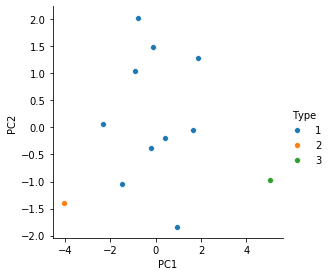

In [339]:
sns.pairplot(x_vars=['PC1'], y_vars=['PC2'], data=ex_2, hue="Type",  height=4)